In [26]:
from acevedo_clss_and_fcns import * 
device = 'cpu'
if torch.cuda.is_available():
    torch.cuda.init()
    if torch.cuda.is_initialized():
        device = 'cuda:0'
#device = torch.device(device)
print(f"{device = }")
from torch_geometric.nn import GNNExplainer

    

model = torch.load(
"./results/trained_pytorch_models/Non_masked_Phe/Model_GIN_classifier_to_explain_v2_25-10-2022_14h_06min_best_ValAcc_0.989815164089023_epoch_9.pt")
model.FC2 = torch.nn.Identity()
model.leakyrelu= torch.nn.Identity()

device = 'cuda:0'


In [27]:
loader_path = "./results/dataloaders/loader_Concen_plus_Fluxes.pt"
loader = torch.load(loader_path)
loader_validation = loader.get_validation_loader()
loader_train = loader.get_train_loader()
#a_batch = next(iter(loader_validation)).to(device, non_blocking=True)
model.eval()
device = "cpu"
model.to(device,  non_blocking=True)
cat_outputs = []
labels = []

a_batch = next(iter(loader_train))

output = model(a_batch.x.to(device, non_blocking=True), a_batch.edge_index.to(device, non_blocking=True), a_batch.batch.to(device, non_blocking=True))#.cpu().detach().numpy()


In [28]:

for a_batch in loader_validation:
    output = model(a_batch.x.to(device, non_blocking=True), a_batch.edge_index.to(device, non_blocking=True), a_batch.batch.to(device, non_blocking=True))#.cpu().detach().numpy()
    cat_outputs.append(output)
    labels.append(a_batch.y.cpu().detach().numpy())
    

intermediate_output = torch.cat(cat_outputs).cpu().detach().numpy()


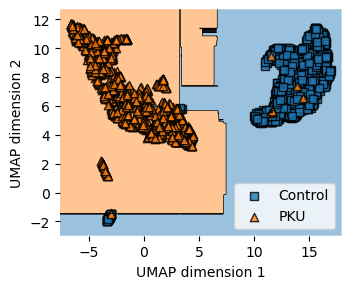

In [29]:
import numpy as np
import umap

def plot_classsifiers_v2(X, y):
    
    clf3 = RandomForestClassifier()
    #clf4 = SVC(gamma='auto')

    gs = gridspec.GridSpec(3, 2)
    fig = plt.figure(figsize=(8,10))
    labels = ['']
    for clf, lab, grd in zip([clf3],
                            labels,
                            [(0,0), (0,1)]):
        clf.fit(X, y)
        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X=X, y=y, clf=clf)
        
        handles, labels = fig.get_legend_handles_labels()
        ax.legend(handles, 
          ['Control', 'PKU'], 
           framealpha=0.8, scatterpoints=1)
        plt.title(lab)
        plt.xlabel('UMAP dimension 1')
        plt.ylabel('UMAP dimension 2')
    plt.show()


reducer = umap.UMAP()
embedding = reducer.fit_transform(intermediate_output)
plot_classsifiers_v2(embedding, np.array(labels).flatten())
plt.show()

In [30]:
intermediate_output.shape

(2624, 11642)

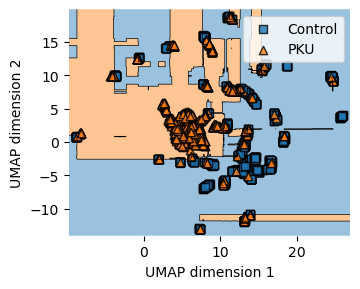

In [31]:
from acevedo_clss_and_fcns import *
import torch
loader_path     = "./results/dataloaders/loader_Concen_plus_Fluxes.pt"
loader = torch.load(loader_path)
loader_validation = loader.get_validation_loader()

#train_classifiers_with_dataloader(loader.get_train_loader())
contatenated = torch.Tensor()
labels_from_loader       = torch.Tensor()

for data in loader_validation:  # Iterate in batches over the training dataset.
            #data.to('cuda')
            #out = model(data.x, data.edge_index, data.batch)
        reshaped_batch     = data.x.reshape(data.y.shape[0], -1)
        contatenated       = torch.cat((contatenated,reshaped_batch),0)        
        labels_from_loader = torch.cat((labels_from_loader, data.y),0)
X_from_loader = contatenated#[:,non_zero_cols]

reducer = umap.UMAP()
embedding = reducer.fit_transform(X_from_loader)
plot_classsifiers_v2(embedding, labels_from_loader.to(int).numpy())
plt.show()

In [32]:
model_2 = torch.load(
"./results/trained_pytorch_models/Masked_Phe/Model_GIN_classifier_to_explain_v2_25-10-2022_14h_09min_best_ValAcc_0.9105997736703131_epoch_38.pt")
model_2.FC2 = torch.nn.Identity()
model_2.leakyrelu= torch.nn.Identity()
model_2.to(device,  non_blocking=True)

for a_batch in loader_validation:
    output = model_2(a_batch.x.to(device, non_blocking=True), a_batch.edge_index.to(device, non_blocking=True), a_batch.batch.to(device, non_blocking=True))#.cpu().detach().numpy()
    cat_outputs.append(output)
    labels.append(a_batch.y.cpu().detach().numpy())
    

intermediate_output = torch.cat(cat_outputs).cpu().detach().numpy()

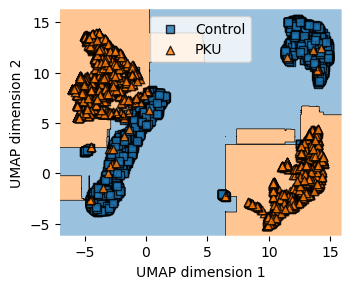

In [33]:
import numpy as np
import umap




reducer = umap.UMAP()
embedding = reducer.fit_transform(intermediate_output)
plot_classsifiers_v2(embedding, np.array(labels).flatten())
plt.show()